<img src='11.jpg'>

In [3]:
#pip install pycaret

In [41]:
import pandas as pd

In [42]:
#Regression AutoMl

In [43]:
from pycaret.regression import*

In [44]:
df=pd.read_csv('train.csv')

In [45]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [46]:
abs(df.corr(numeric_only=True)['target'].sort_values(ascending=False))

target     1.000000
calc       0.467439
gravity    0.282577
urea       0.265211
osmo       0.244770
cond       0.172224
id         0.018222
ph         0.094983
Name: target, dtype: float64

In [47]:
data=df[["calc","gravity","urea","osmo","target"]]

In [48]:
#Classification

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   calc     414 non-null    float64
 1   gravity  414 non-null    float64
 2   urea     414 non-null    int64  
 3   osmo     414 non-null    int64  
 4   target   414 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 16.3 KB


In [50]:
from pycaret.classification import*

In [51]:
setup(data,target='target')

,Description,Value
0,Session id,8823
1,Target,target
2,Target type,Binary
3,Original data shape,"(414, 5)"
4,Transformed data shape,"(414, 5)"
5,Transformed train set shape,"(289, 5)"
6,Transformed test set shape,"(125, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [52]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7438,0.7823,0.5532,0.8194,0.6500,0.4614,0.4900,0.0360
ridge,Ridge Classifier,0.7404,0.0000,0.5372,0.8173,0.6364,0.4516,0.4811,0.0240
lda,Linear Discriminant Analysis,0.7232,0.7856,0.5462,0.7713,0.6304,0.4209,0.4424,0.0380
qda,Quadratic Discriminant Analysis,0.7230,0.7805,0.5449,0.7686,0.6249,0.4188,0.4413,0.0270
nb,Naive Bayes,0.6990,0.7655,0.6647,0.6638,0.6579,0.3899,0.3975,0.0260
gbc,Gradient Boosting Classifier,0.6988,0.7486,0.6263,0.6786,0.6417,0.3854,0.3925,0.1540
et,Extra Trees Classifier,0.6882,0.7526,0.6301,0.6482,0.6332,0.3625,0.3676,0.2570
lightgbm,Light Gradient Boosting Machine,0.6851,0.7316,0.6167,0.6602,0.6284,0.3569,0.3654,0.4850
rf,Random Forest Classifier,0.6849,0.7703,0.6083,0.6579,0.6260,0.3554,0.3606,0.2040
dt,Decision Tree Classifier,0.6813,0.6695,0.5987,0.6627,0.6166,0.3458,0.3552,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8823, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
best_model=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6897,0.7451,0.3333,0.8000,0.4706,0.3003,0.3579
1,0.8276,0.8606,0.6154,1.0000,0.7619,0.6384,0.6847
2,0.6897,0.7212,0.6154,0.6667,0.6400,0.3680,0.3689
3,0.6897,0.6394,0.3846,0.8333,0.5263,0.3392,0.3955
4,0.7931,0.8077,0.7692,0.7692,0.7692,0.5817,0.5817
5,0.7586,0.7260,0.5385,0.8750,0.6667,0.4938,0.5296
6,0.7586,0.8894,0.6154,0.8000,0.6957,0.5012,0.5131
7,0.8276,0.8942,0.6154,1.0000,0.7619,0.6384,0.6847
8,0.6897,0.7163,0.4615,0.7500,0.5714,0.3491,0.3745


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

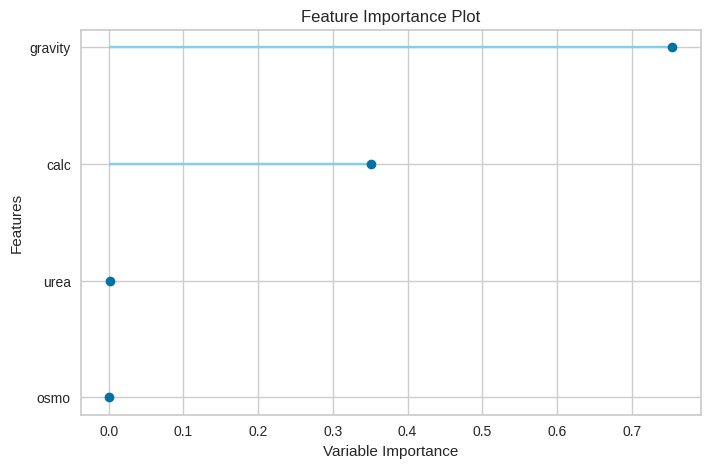

In [54]:
plot_model(best_model,plot='feature')

In [55]:
#AUTO ML İLE %74 BAŞARI ELDE EDİLDİ

In [56]:
df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

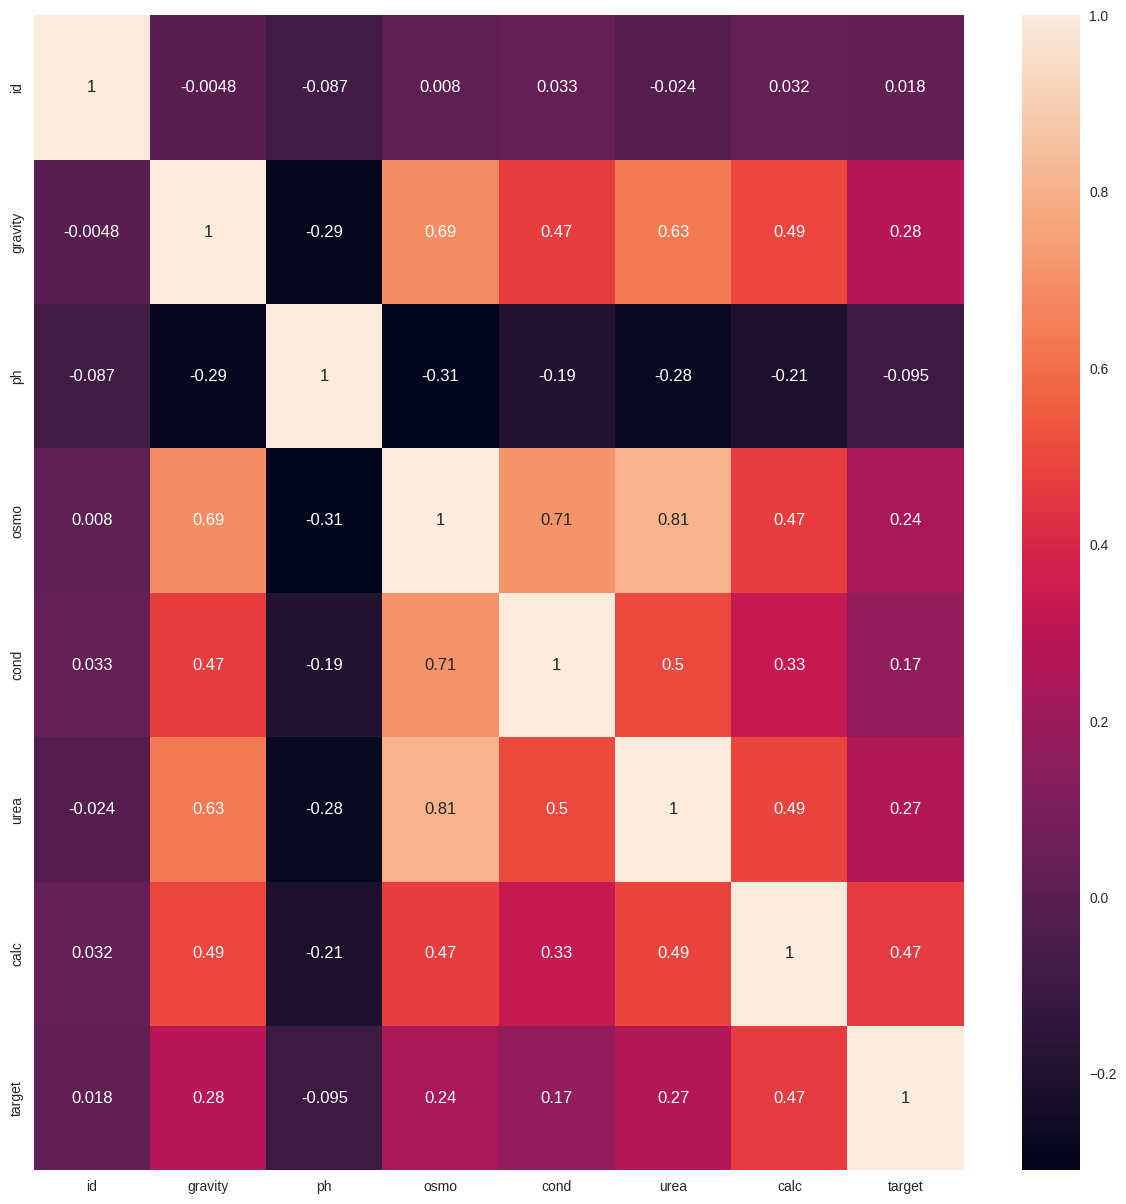

In [60]:
ax=plt.figure(figsize=(15,15));
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [64]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [65]:
x=df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
y=df[["target"]]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [68]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((331, 6), (83, 6), (331, 1), (83, 1))

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

#classification algoritmaları

In [70]:
g.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
tahmin1=g.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [74]:
accuracy_score(tahmin1,y_test)

0.7831325301204819

In [75]:
b.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True,
            force_alpha='warn')

In [76]:
tahmin2=b.predict(x_test)

In [77]:
accuracy_score(tahmin2,y_test)

0.5421686746987951

In [78]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [79]:
k.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
tahmin3=k.predict(x_test)

In [81]:
accuracy_score(tahmin3,y_test)

0.6265060240963856

In [82]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [83]:
l.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
tahmin4=l.predict(x_test)

In [85]:
accuracy_score(tahmin4,y_test)

0.7831325301204819

In [86]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [87]:
d.fit(x_train,y_train)
# overfitting undercutting

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [88]:
tahmin5=d.predict(x_test)

In [89]:
accuracy_score(tahmin5,y_test)

0.6506024096385542

In [90]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [91]:
r.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [92]:
tahmin6=r.predict(x_test)

In [93]:
accuracy_score(tahmin6,y_test)

0.7108433734939759

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [95]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
tahmin7=gb.predict(x_test)

In [97]:
accuracy_score(tahmin7,y_test)

0.7951807228915663

In [98]:
#EN İYİ SONUCU BULMUŞ OLDUK